<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise_2X/blob/main/Generate_groupwise_2X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Generating random numbers from a uniform distribution
https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781787125698/12/ch25lvl1sec126/generating-random-numbers-from-a-uniform-distribution

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy.random import normal
import statistics
import statistics as stats
import scipy.stats as ss
from scipy import stats
import scipy.stats as stats
import random
import statsmodels.api as sm
%matplotlib inline
from google.colab import files
import math

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [31]:
sp.random.seed(314157)

In [40]:
n=20
rep=0
#sp.random.seed(314157)
table_data_all=pd.DataFrame({"rep":[]})
for i in range(1000):
    data = pd.DataFrame({"X1" : sp.random.uniform(20, 100, n),
                         "X2" : sp.random.uniform(20, 100, n)})
    table_data = data.copy()

    table_data.loc[:math.floor(n/2),"e"] = table_data.loc[:math.floor(n/2),"X2"].apply(lambda X2: np.random.normal(0, math.sqrt(0.5)))
    table_data.loc[math.floor(n/2):,"e"] = table_data.loc[math.floor(n/2):,"X2"].apply(lambda X2: np.random.normal(0, math.sqrt(0.5)))
    # display(table_data.loc[:math.floor(n/2),"e"])
    # display(table_data.loc[math.floor(n/2):,"e"])
    # ==========================================

    # table_data = data_new.copy()


    table_data["Y"] = 10 + table_data["X1"] + table_data["X2"] + table_data["e"]
    
    table_data=table_data.reset_index(drop=True).reset_index()
    table_data["rep"]=rep
    new_data = table_data.copy()

    # ==========================================
    x = new_data[["X1", "X2"]]
    y = new_data["Y"]
    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    y_pred = model.predict(x)

    df = pd.DataFrame({"Actual": y, "Predicted": y_pred})

    table_data_new = pd.DataFrame({"x1"    : new_data["X1"],
                                   "x2"    : new_data["X2"],
                                   "e"     : new_data["e"],
                                   "Y"     : df["Actual"],
                                   "y_hat" : df["Predicted"]})
    table_data_new["e_hat"] = table_data_new["Y"] - table_data_new["y_hat"]
    table_data_new["rep"] = rep
    table_data_new = table_data_new.reset_index()
    table_data_new
    # ==========================================
    table_data_all=pd.concat([table_data_all,table_data_new],axis=0,ignore_index=True,sort=False)
    rep+=1
    if rep==1000:
      break
table_data_all=table_data_all.set_index(["rep", "index"])
table_data_all

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    48.916007  61.291141  0.000794  120.207943  119.742745  0.465197
      1.0    75.379398  36.979257 -1.250281  121.108374  121.799310 -0.690936
      2.0    65.821052  68.063715 -1.278847  142.605920  143.323739 -0.717819
      3.0    62.153380  34.443484  0.077187  106.674051  106.108659  0.565392
      4.0    62.661948  32.954699 -0.306125  105.310522  105.128265  0.182257
...                ...        ...       ...         ...         ...       ...
999.0 15.0   74.051041  75.476707  0.522392  160.050139  159.823043  0.227096
      16.0   87.089943  33.267252  1.346132  131.703327  130.642920  1.060407
      17.0   36.783928  98.906857  0.092394  145.783179  145.798894 -0.015715
      18.0   66.658921  85.610436 -0.522618  161.746739  162.539631 -0.792892
      19.0   36.260172  79.636425 -0.515745  125.380852  125.958820 -0.577968

[20000 rows x 6 columns]

In [6]:
tablenew0 = table_data_all.loc[0.0]
tablenew1 = table_data_all.loc[1.0]
tablenew2 = table_data_all.loc[2.0]
tablenew3 = table_data_all.loc[3.0]
tablenew4 = table_data_all.loc[4.0]
tablenew5 = table_data_all.loc[5.0]
tablenew6 = table_data_all.loc[6.0]
tablenew7 = table_data_all.loc[7.0]
tablenew8 = table_data_all.loc[8.0]
tablenew9 = table_data_all.loc[9.0]

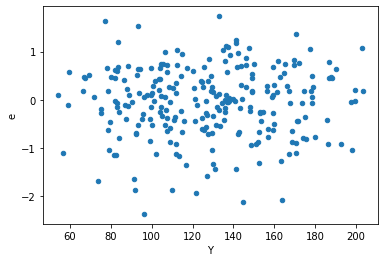

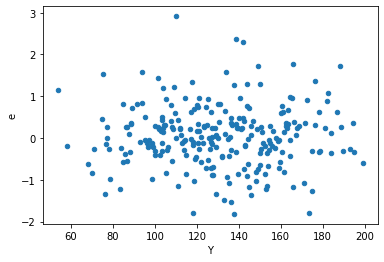

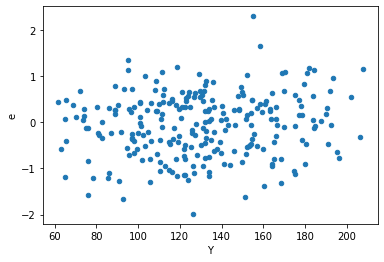

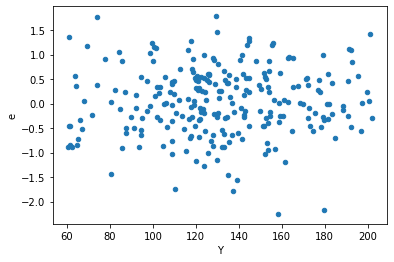

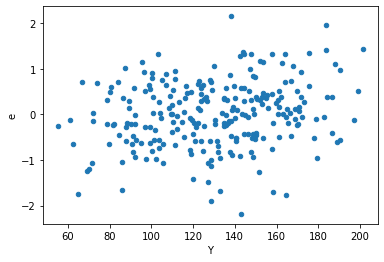

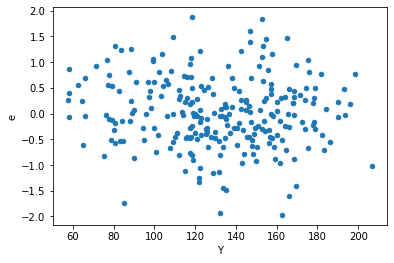

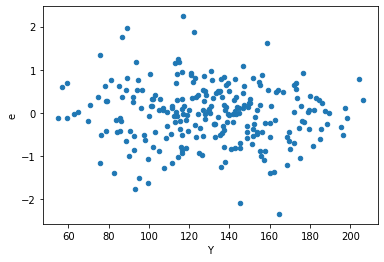

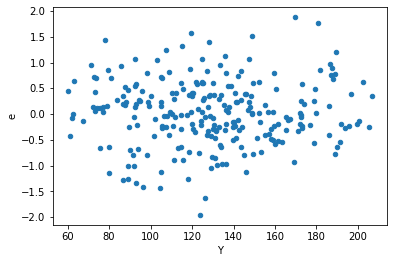

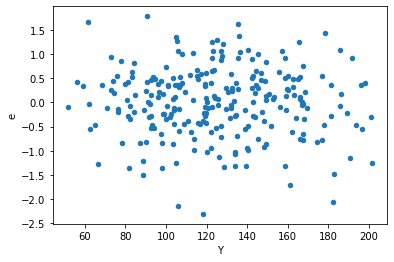

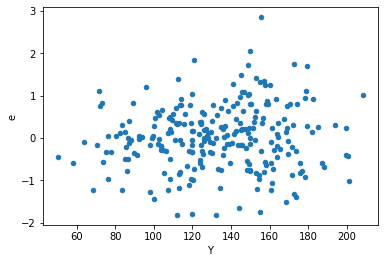

In [7]:
tablenew0.plot(x ='Y', y='e', kind = 'scatter')
tablenew1.plot(x ='Y', y='e', kind = 'scatter')
tablenew2.plot(x ='Y', y='e', kind = 'scatter')
tablenew3.plot(x ='Y', y='e', kind = 'scatter')
tablenew4.plot(x ='Y', y='e', kind = 'scatter')
tablenew5.plot(x ='Y', y='e', kind = 'scatter')
tablenew6.plot(x ='Y', y='e', kind = 'scatter')
tablenew7.plot(x ='Y', y='e', kind = 'scatter')
tablenew8.plot(x ='Y', y='e', kind = 'scatter')
tablenew9.plot(x ='Y', y='e', kind = 'scatter')

In [41]:
table_data_all.to_csv('data_groupwise_0.5_n20.csv')
files.download('data_groupwise_0.5_n20.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>